In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [17]:
data=pd.read_csv("Company_Data.csv")

In [18]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
from sklearn import preprocessing

In [21]:
le = preprocessing.LabelEncoder()

In [22]:
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data["Urban"]=le.fit_transform(data["Urban"])
data["US"]=le.fit_transform(data["US"])

In [23]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [25]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [9]:
data.isnull().sum()

,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


<Axes: >

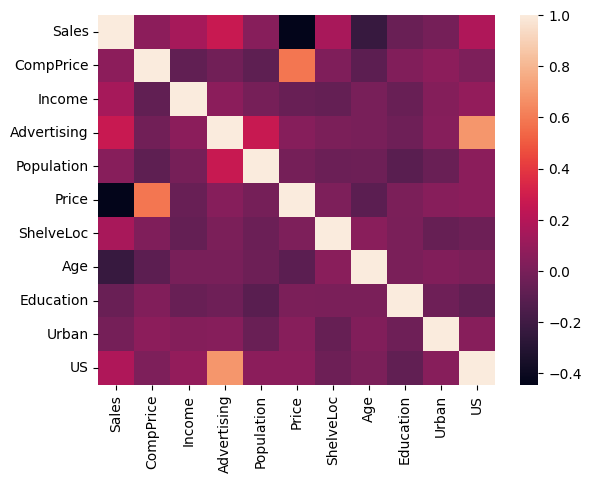

In [26]:
sns.heatmap(data.corr())

In [27]:
data=data.assign(Sale=pd.cut(data['Sales'],
                               bins=[ 0, 4, 9,15],
                               labels=['Low', 'Medium', 'High']))

In [28]:
data.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium
5,10.81,124,113,13,501,72,0,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Medium
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Medium
9,4.69,132,113,0,131,124,2,76,17,0,1,Medium


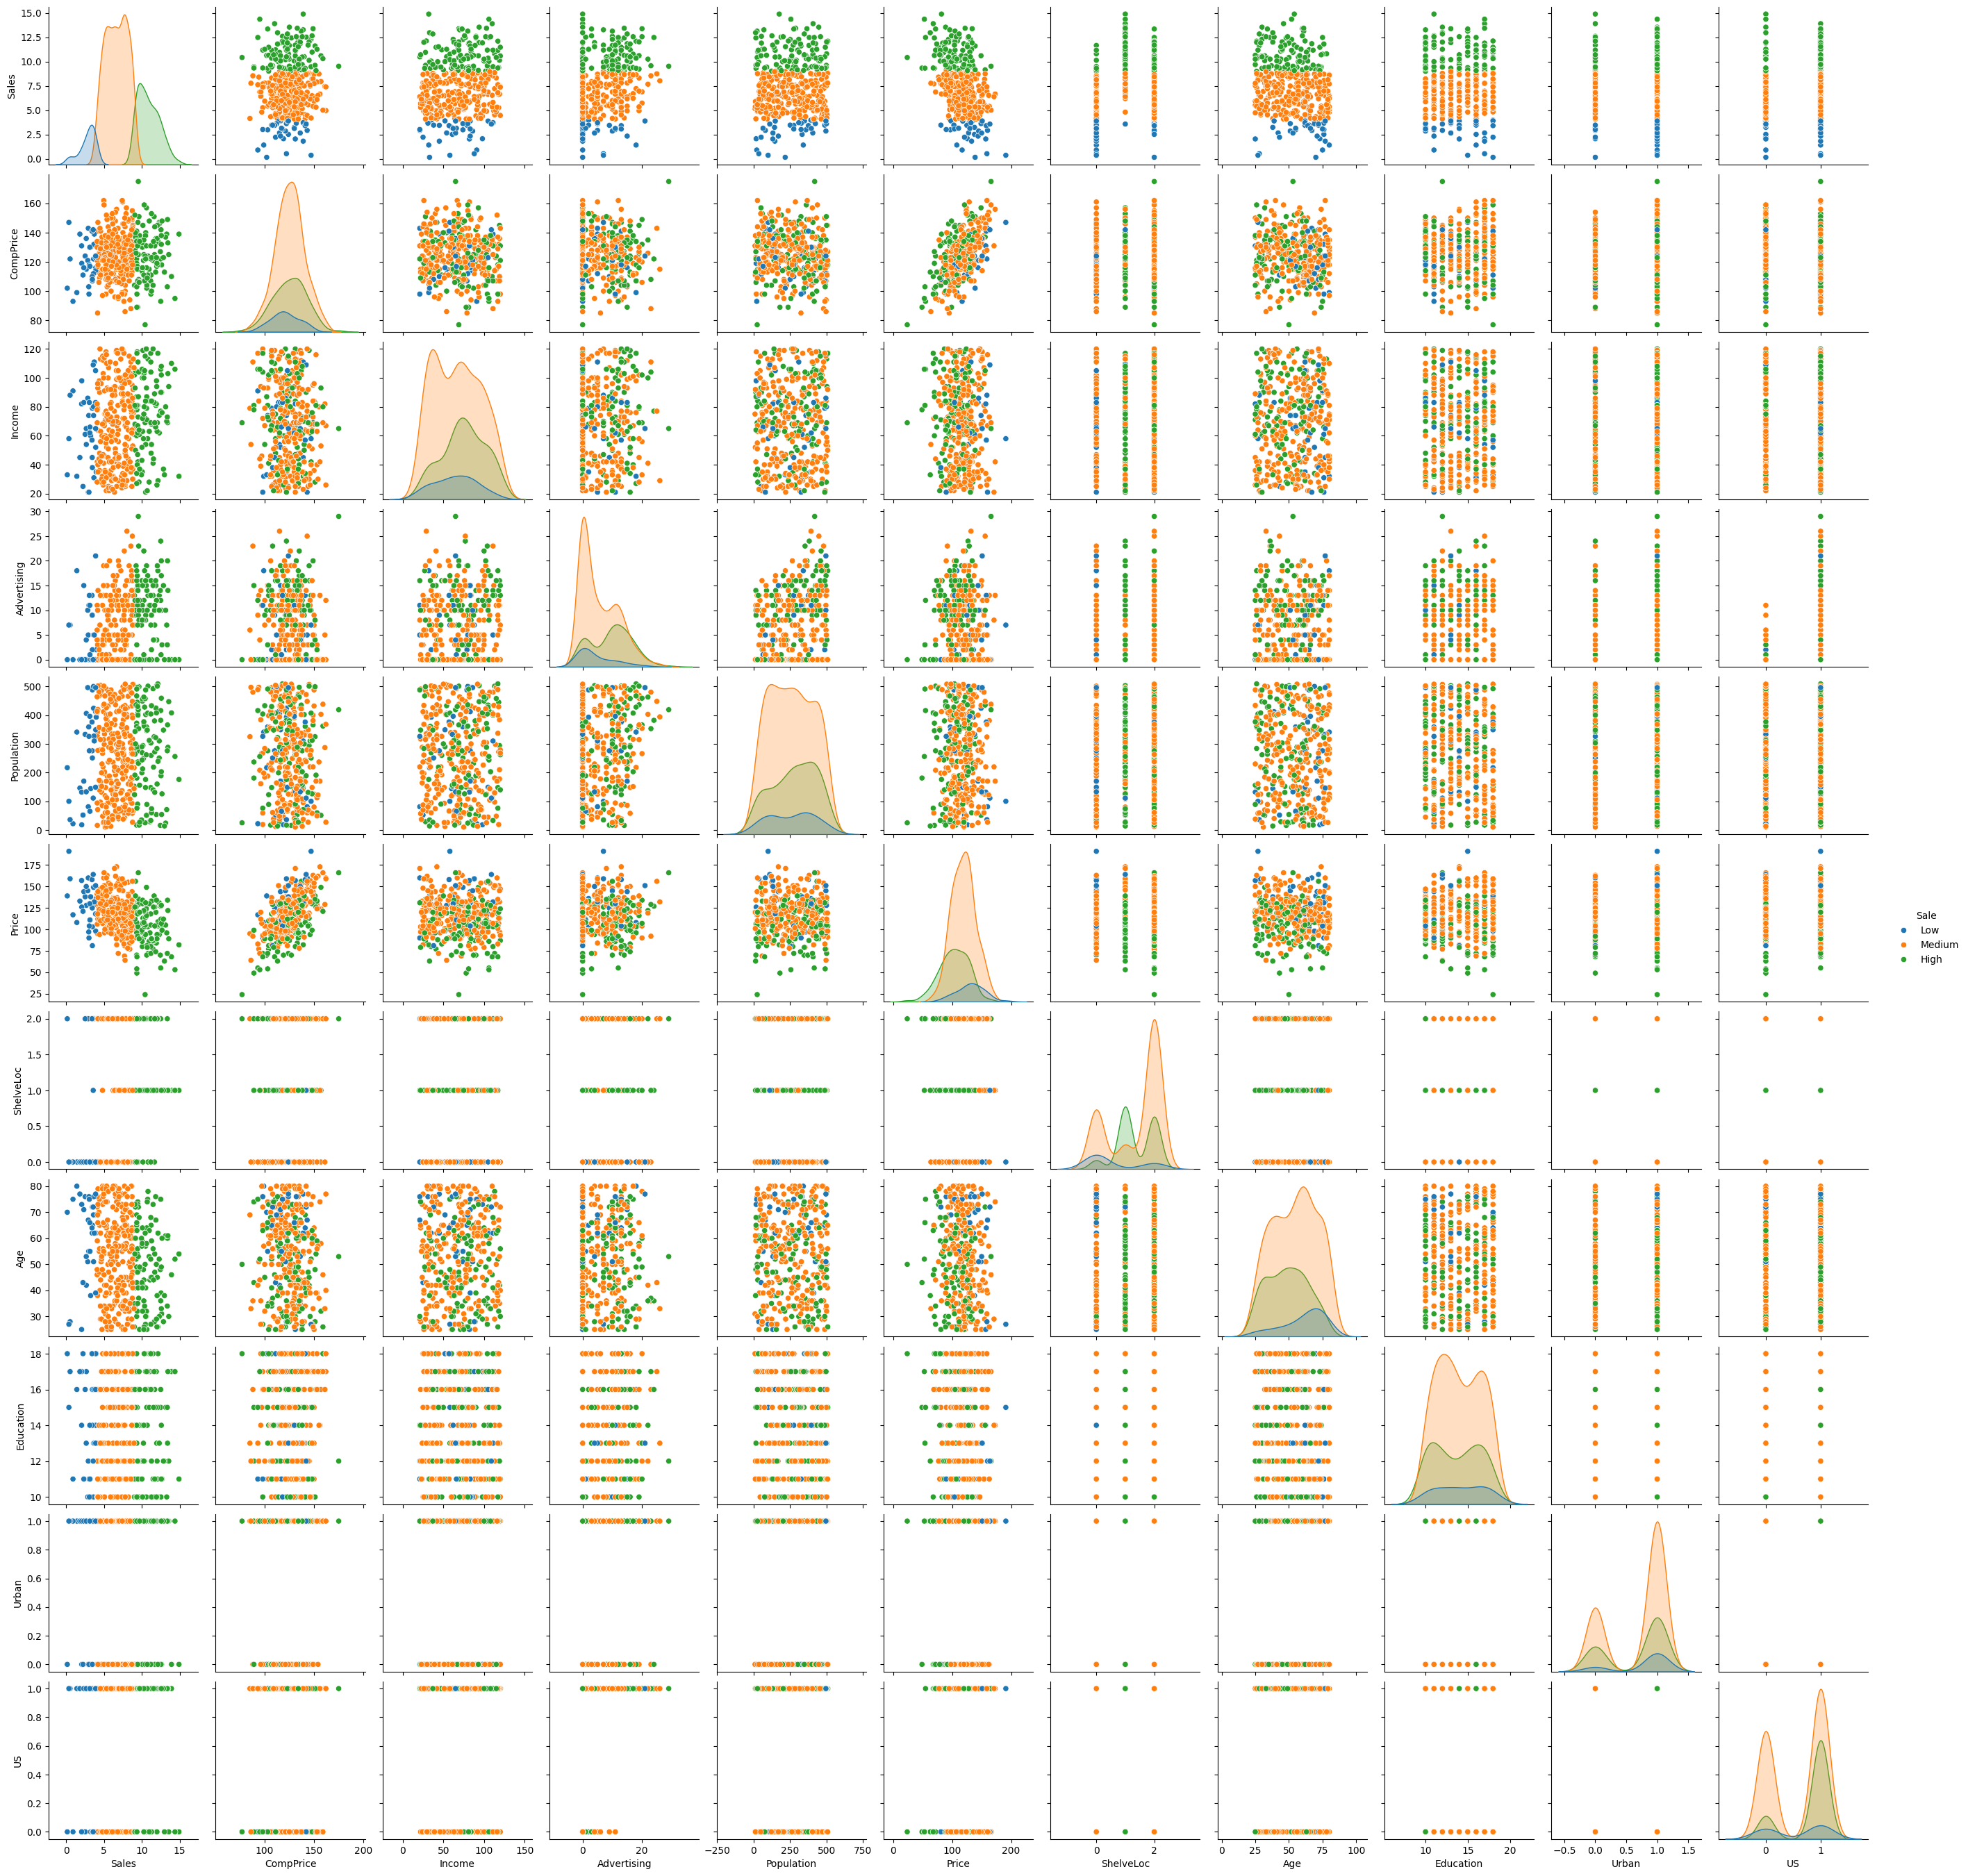

In [29]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = "Sale")

In [30]:
target = pd.DataFrame.astype(data['Sale'], dtype="object")
df1 = data.copy()
df1 = df1.drop('Sale', axis =1)

In [31]:
# Defining the attributes
X = df1

In [32]:
target = target.fillna('').apply(str)
target

,Sale
0,High
1,High
2,High
3,Medium
4,Medium
...,...
395,High
396,Medium
397,Medium
398,Medium


In [33]:
#label encoding
target = le.fit_transform(target)
target

array([1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3,

In [34]:
y = target


In [35]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =25)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (320, 11)
Testing split input-  (80, 11)


In [36]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [37]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        53

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [45]:
print(confusion_matrix(y_test,y_pred))

[[ 1  0  0  0]
 [ 0 18  0  0]
 [ 0  0  8  0]
 [ 0  0  0 53]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

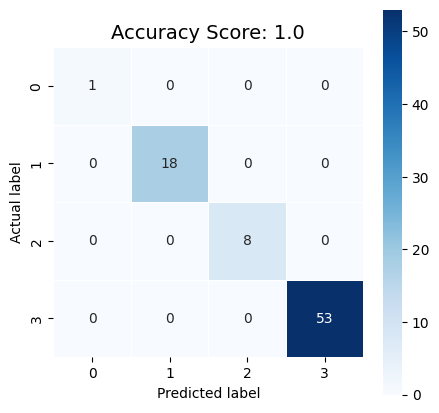

In [46]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

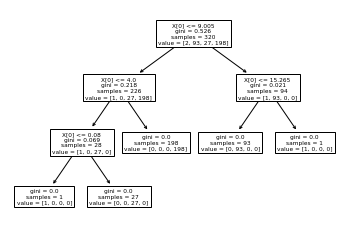

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(dtree);

In [ ]:
#Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Predicting the values of test data
y_pred1 = model.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

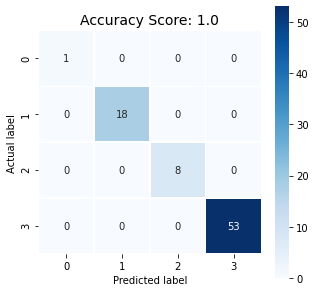

In [ ]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

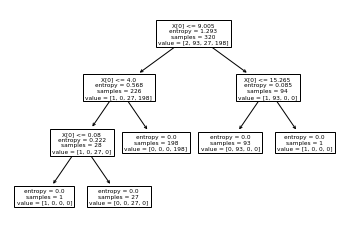

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);